In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torchvision import models
from torch.utils.data import DataLoader, Dataset
import torch.utils.data as utils
from torchvision import transforms
import torch.nn.functional as F
from torch.optim import Adam
import cv2
from torchmetrics import JaccardIndex

import sys
sys.path.append("src")
from data import UnlabeledDataset, LabeledDataset, ValidationDataset


/home/dqian/miniconda3/envs/NYU-DL/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/dqian/miniconda3/envs/NYU-DL/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [ ]:
dataset = ValidationDataset("Dataset_Student")
model = torch.load('./unet.pkl', map_location=torch.device('cpu')) # currently istrained 50-class model, remember to modify

num_check = 50 # video index to display, choose from 0~999
frame_check = 1 # frame index to display, choose from 0~21
input = dataset[num_check][0][frame_check].unsqueeze(0)
input = input
# print(dataset[num_check][0][frame_check][0][159])

output = model(input) 
outputs = nn.LogSoftmax()(output)
outputs = torch.argmax(outputs, dim=1)
print(outputs.shape)


outputs=outputs.squeeze(0).cpu().numpy()


(array([ 0,  3, 11, 16, 19, 30, 32, 33, 41, 48]), array([62026,  1628,    89,   880,    33,   356,    33,   351,    10,
         130]))


Text(0.5, 1.0, 'Predicted Image')

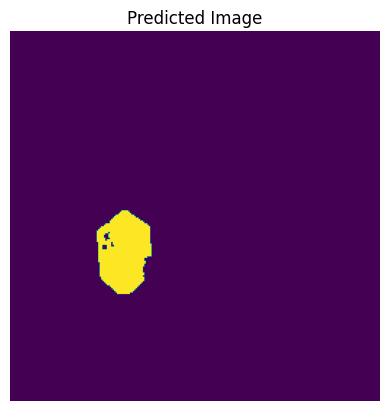

In [27]:
print(np.unique(outputs.flatten(),return_counts=True))
single = (outputs == 3) * outputs

plt.imshow(single)
plt.axis('off')  
plt.title('Predicted Image')

(array([ 0,  1,  3, 30, 48], dtype=uint8), array([36307,   221,  1038,   201,   633]))


Text(0.5, 1.0, 'Ground Truth Label Image')

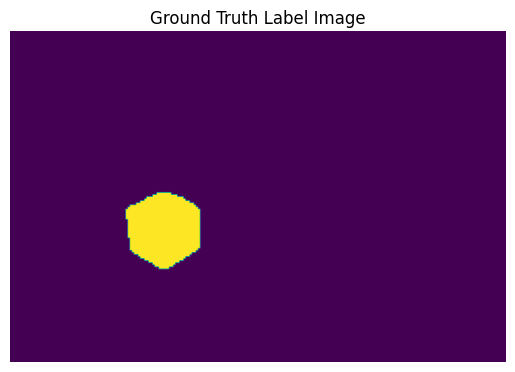

In [28]:
input = dataset[num_check][1][frame_check]

plt.imshow(input)
plt.axis('off')  
plt.title('Ground Truth Label Image')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Actual Normalized Image')

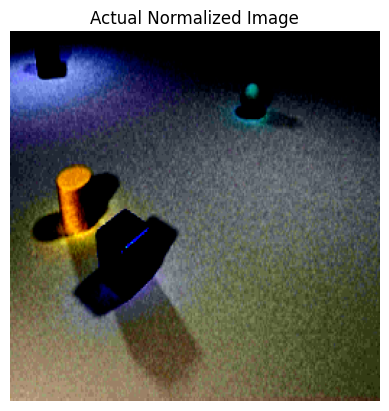

In [9]:
input = dataset[num_check][0][frame_check]

plt.imshow(input.permute(1, 2, 0))
plt.axis('off')  
plt.title('Actual Normalized Image')